In [1]:
import numpy as np
import pandas as pd

In [2]:
dataset=pd.read_csv('1. Master H1B Dataset.csv',encoding='latin1')

C:\Users\Hpp\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (25) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
dataset.head(5)

,CASE_SUBMITTED_DAY,CASE_SUBMITTED_MONTH,CASE_SUBMITTED_YEAR,DECISION_DAY,DECISION_MONTH,DECISION_YEAR,VISA_CLASS,EMPLOYER_NAME,EMPLOYER_STATE,EMPLOYER_COUNTRY,...,PW_SOURCE_YEAR,PW_SOURCE_OTHER,WAGE_RATE_OF_PAY_FROM,WAGE_RATE_OF_PAY_TO,WAGE_UNIT_OF_PAY,H-1B_DEPENDENT,WILLFUL_VIOLATOR,WORKSITE_STATE,WORKSITE_POSTAL_CODE,CASE_STATUS
0,24,2,2016,1,10,2016,H1B,DISCOVER PRODUCTS INC,IL,UNITED STATES OF AMERICA,...,2015.0,OFLC ONLINE DATA CENTER,65811.0,67320.0,Year,N,N,IL,60015,CERTIFIEDWITHDRAWN
1,4,3,2016,1,10,2016,H1B,DFS SERVICES LLC,IL,UNITED STATES OF AMERICA,...,2015.0,WILLIS TOWERS WATSON SURVEY,53000.0,57200.0,Year,N,N,IL,60015,CERTIFIEDWITHDRAWN
2,10,3,2016,1,10,2016,H1B,EASTBANC TECHNOLOGIES LLC,DC,UNITED STATES OF AMERICA,...,2015.0,OFLC ONLINE DATA CENTER,77000.0,0.0,Year,Y,N,DC,20007,CERTIFIEDWITHDRAWN
3,28,9,2016,1,10,2016,H1B,INFO SERVICES LLC,MI,UNITED STATES OF AMERICA,...,2016.0,OFLC ONLINE DATA CENTER,102000.0,0.0,Year,Y,N,NJ,7302,WITHDRAWN
4,22,2,2015,2,10,2016,H1B,BBandT CORPORATION,NC,UNITED STATES OF AMERICA,...,2015.0,OFLC ONLINE DATA CENTER,132500.0,0.0,Year,N,N,NY,10036,CERTIFIEDWITHDRAWN


In [4]:
dataset.drop('PW_UNIT_OF_PAY',axis=1,inplace=True)

In [5]:
dataset.drop('DECISION_DAY',axis=1,inplace=True)

In [6]:
dataset.drop('DECISION_MONTH',axis=1,inplace=True)

In [7]:
dataset.drop('NAICS_CODE',axis=1,inplace=True)

In [9]:
dataset.drop('TOTAL_WORKERS',axis=1,inplace=True)

In [10]:
dataset.drop('WAGE_UNIT_OF_PAY',axis=1,inplace=True)

In [11]:
dataset.drop('WAGE_RATE_OF_PAY_FROM',axis=1,inplace=True)

In [12]:
dataset.drop('WAGE_RATE_OF_PAY_TO',axis=1,inplace=True)

In [13]:
dataset.drop('H-1B_DEPENDENT',axis=1,inplace=True)

In [14]:
dataset.drop('PW_SOURCE',axis=1,inplace=True)

In [15]:
dataset.drop('WILLFUL_VIOLATOR',axis=1,inplace=True)

In [16]:
dataset.drop('WORKSITE_POSTAL_CODE',axis=1,inplace=True)

In [17]:
dataset.drop('CASE_SUBMITTED_DAY',axis=1,inplace=True)

In [18]:
dataset.drop('DECISION_YEAR',axis=1,inplace=True)

In [19]:
dataset.drop('VISA_CLASS',axis=1,inplace=True)

In [20]:
dataset.drop('EMPLOYER_STATE',axis=1,inplace=True)

In [21]:
dataset.drop('EMPLOYER_COUNTRY',axis=1,inplace=True)

In [22]:
dataset.drop('CASE_SUBMITTED_MONTH',axis=1,inplace=True)

In [23]:
dataset.drop('CASE_SUBMITTED_YEAR',axis=1,inplace=True)

In [24]:
dataset.drop('EMPLOYER_NAME',axis=1,inplace=True)

In [25]:
dataset.drop('SOC_NAME',axis=1,inplace=True)

In [26]:
dataset.isnull().any()

FULL_TIME_POSITION     True
PREVAILING_WAGE       False
PW_SOURCE_YEAR         True
PW_SOURCE_OTHER       False
WORKSITE_STATE        False
CASE_STATUS           False
dtype: bool

In [27]:
dataset.head(2)

,FULL_TIME_POSITION,PREVAILING_WAGE,PW_SOURCE_YEAR,PW_SOURCE_OTHER,WORKSITE_STATE,CASE_STATUS
0,Y,59197.0,2015.0,OFLC ONLINE DATA CENTER,IL,CERTIFIEDWITHDRAWN
1,Y,49800.0,2015.0,WILLIS TOWERS WATSON SURVEY,IL,CERTIFIEDWITHDRAWN


In [28]:
dataset['FULL_TIME_POSITION'].fillna(dataset['FULL_TIME_POSITION'].mode()[0],inplace=True)
dataset['PW_SOURCE_YEAR'].fillna(dataset['PW_SOURCE_YEAR'].mode()[0],inplace=True)

In [29]:
dataset.isnull().any()

FULL_TIME_POSITION    False
PREVAILING_WAGE       False
PW_SOURCE_YEAR        False
PW_SOURCE_OTHER       False
WORKSITE_STATE        False
CASE_STATUS           False
dtype: bool

In [30]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset['FULL_TIME_POSITION']= le.fit_transform(dataset['FULL_TIME_POSITION'])
dataset['PW_SOURCE_OTHER']= le.fit_transform(dataset['PW_SOURCE_OTHER'])
dataset['WORKSITE_STATE']= le.fit_transform(dataset['WORKSITE_STATE'])
dataset['CASE_STATUS']= le.fit_transform(dataset['CASE_STATUS'])

In [31]:
dataset.head(5)

,FULL_TIME_POSITION,PREVAILING_WAGE,PW_SOURCE_YEAR,PW_SOURCE_OTHER,WORKSITE_STATE,CASE_STATUS
0,1,59197.0,2015.0,157,15,1
1,1,49800.0,2015.0,231,15,1
2,1,76502.0,2015.0,157,7,1
3,1,90376.0,2016.0,157,33,3
4,1,116605.0,2015.0,157,36,1


In [41]:
x=dataset.iloc[:,1:5].values
y=dataset.iloc[:,5:6].values

In [42]:
x.shape

(528134, 4)

In [43]:
y.shape

(528134, 1)

In [44]:
x

array([[5.91970e+04, 2.01500e+03, 1.57000e+02, 1.50000e+01],
       [4.98000e+04, 2.01500e+03, 2.31000e+02, 1.50000e+01],
       [7.65020e+04, 2.01500e+03, 1.57000e+02, 7.00000e+00],
       ...,
       [7.94980e+04, 2.01600e+03, 1.57000e+02, 4.60000e+01],
       [1.18352e+05, 2.01600e+03, 1.57000e+02, 2.50000e+01],
       [4.91300e+04, 2.01600e+03, 1.57000e+02, 4.70000e+01]])

In [45]:
y

array([[1],
       [1],
       [1],
       ...,
       [3],
       [3],
       [3]])

In [46]:
dataset.describe()

,FULL_TIME_POSITION,PREVAILING_WAGE,PW_SOURCE_YEAR,PW_SOURCE_OTHER,WORKSITE_STATE,CASE_STATUS
count,528134.000000,528134.000000,528134.000000,528134.000000,528134.000000,528134.000000
mean,0.976905,71674.254471,2016.057254,157.066091,24.951001,0.185885
std,0.150204,31996.910281,5.562806,14.778197,16.464033,0.599737
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,55910.000000,2016.000000,157.000000,9.000000,0.000000
50%,1.000000,68827.000000,2016.000000,157.000000,24.000000,0.000000
75%,1.000000,87214.000000,2016.000000,157.000000,39.000000,0.000000
max,1.000000,414007.000000,2017.000000,235.000000,54.000000,3.000000


In [47]:
import matplotlib.pyplot as plt
%matplotlib inline

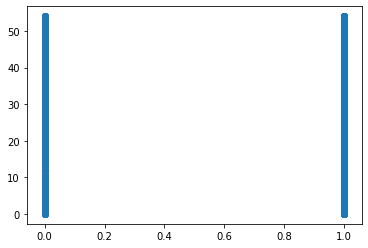

In [39]:
plt.scatter(dataset['FULL_TIME_POSITION'],dataset['WORKSITE_STATE'])

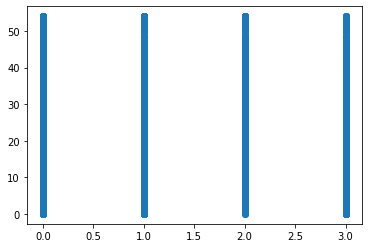

In [40]:
plt.scatter(dataset['CASE_STATUS'],dataset['WORKSITE_STATE'])

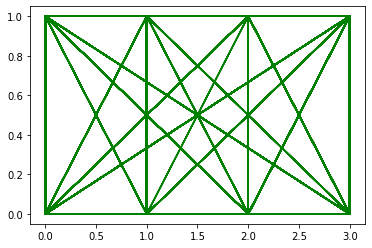

In [41]:
plt.plot(dataset['CASE_STATUS'],dataset['FULL_TIME_POSITION'],'g')

In [48]:
from sklearn.preprocessing import OneHotEncoder
one=OneHotEncoder()
z=one.fit_transform(x[:,3:4]).toarray()
x=np.delete(x,3,axis=1)
x=np.concatenate((z,x),axis=1)

In [49]:
x.shape

(528134, 58)

In [51]:
y.shape

(528134, 1)

In [50]:
z

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [52]:
dataset.describe()

,FULL_TIME_POSITION,PREVAILING_WAGE,PW_SOURCE_YEAR,PW_SOURCE_OTHER,WORKSITE_STATE,CASE_STATUS
count,528134.000000,528134.000000,528134.000000,528134.000000,528134.000000,528134.000000
mean,0.976905,71674.254471,2016.057254,157.066091,24.951001,0.185885
std,0.150204,31996.910281,5.562806,14.778197,16.464033,0.599737
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,55910.000000,2016.000000,157.000000,9.000000,0.000000
50%,1.000000,68827.000000,2016.000000,157.000000,24.000000,0.000000
75%,1.000000,87214.000000,2016.000000,157.000000,39.000000,0.000000
max,1.000000,414007.000000,2017.000000,235.000000,54.000000,3.000000


In [53]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [62]:
x_train.shape

(422507, 58)

In [63]:
x_test.shape

(105627, 58)

In [64]:
y_train.shape

(422507, 1)

In [65]:
y_test.shape

(105627, 1)

In [67]:
from sklearn.model_selection import train_test_split
for i in range(5):
    x_train1,x_test1,y_train1,y_test1= train_test_split(x,y,test_size=0.2)
    
    print ("x_train without random state for the iteration",i,x_train)
    
for i in range(5):
    x_train1,x_test1,y_train1,y_test1= train_test_split(x,y,test_size=0.2,random_state=0)
    
    print ("x_train with random state for the iteration",i,x_train)

x_train without random state for the iteration 0 [[0.0000e+00 0.0000e+00 0.0000e+00 ... 6.4418e+04 2.0170e+03 1.5700e+02]
 [0.0000e+00 0.0000e+00 0.0000e+00 ... 5.5765e+04 2.0160e+03 1.5700e+02]
 [0.0000e+00 0.0000e+00 0.0000e+00 ... 7.1906e+04 2.0160e+03 1.5700e+02]
 ...
 [0.0000e+00 0.0000e+00 0.0000e+00 ... 8.3325e+04 2.0160e+03 1.5700e+02]
 [0.0000e+00 0.0000e+00 1.0000e+00 ... 1.1086e+05 2.0170e+03 1.5700e+02]
 [0.0000e+00 0.0000e+00 0.0000e+00 ... 2.3050e+01 2.0160e+03 1.5700e+02]]
x_train without random state for the iteration 1 [[0.0000e+00 0.0000e+00 0.0000e+00 ... 6.4418e+04 2.0170e+03 1.5700e+02]
 [0.0000e+00 0.0000e+00 0.0000e+00 ... 5.5765e+04 2.0160e+03 1.5700e+02]
 [0.0000e+00 0.0000e+00 0.0000e+00 ... 7.1906e+04 2.0160e+03 1.5700e+02]
 ...
 [0.0000e+00 0.0000e+00 0.0000e+00 ... 8.3325e+04 2.0160e+03 1.5700e+02]
 [0.0000e+00 0.0000e+00 1.0000e+00 ... 1.1086e+05 2.0170e+03 1.5700e+02]
 [0.0000e+00 0.0000e+00 0.0000e+00 ... 2.3050e+01 2.0160e+03 1.5700e+02]]
x_train withou

In [68]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [69]:
x_train

array([[-1.81410281e-02, -5.22424834e-02, -6.81635047e-02, ...,
        -2.27260295e-01,  2.12788330e-01, -3.92413693e-03],
       [-1.81410281e-02, -5.22424834e-02, -6.81635047e-02, ...,
        -4.97666142e-01, -1.43649918e-02, -3.92413693e-03],
       [-1.81410281e-02, -5.22424834e-02, -6.81635047e-02, ...,
         6.73935672e-03, -1.43649918e-02, -3.92413693e-03],
       ...,
       [-1.81410281e-02, -5.22424834e-02, -6.81635047e-02, ...,
         3.63582575e-01, -1.43649918e-02, -3.92413693e-03],
       [-1.81410281e-02, -5.22424834e-02,  1.46706072e+01, ...,
         1.22405004e+00,  2.12788330e-01, -3.92413693e-03],
       [-1.81410281e-02, -5.22424834e-02, -6.81635047e-02, ...,
        -2.23959949e+00, -1.43649918e-02, -3.92413693e-03]])

In [70]:
y_test

array([[1],
       [3],
       [0],
       ...,
       [0],
       [0],
       [0]])